In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# to see the figure
%matplotlib inline 
# format the defalut figure size
matplotlib.rcParams['figure.figsize'] = (8,6)


# Now we need to read in the data
df = pd.read_csv('/Users/swimhsu/Downloads/movies.csv')


In [18]:
# Look at data
df.head(20)

name rating      genre  year  \
0                                      The Shining      R      Drama  1980   
1                                  The Blue Lagoon      R  Adventure  1980   
2   Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                        Airplane!     PG     Comedy  1980   
4                                       Caddyshack      R     Comedy  1980   
5                                  Friday the 13th      R     Horror  1980   
6                               The Blues Brothers      R     Action  1980   
7                                      Raging Bull      R  Biography  1980   
8                                      Superman II     PG     Action  1980   
9                                  The Long Riders      R  Biography  1980   
10                           Any Which Way You Can     PG     Action  1980   
11                          The Gods Must Be Crazy     PG  Adventure  1980   
12                                          Popeye     PG  Adventure  1980   
13                                 Ordinary People      R      Drama  1980   
14                                 Dressed to Kill      R      Crime  1980   
15                               Somewhere in Time     PG      Drama  1980   
16                                            Fame      R      Drama  1980   
17                                          9 to 5     PG     Comedy  1980   
18                                         The Fog      R     Horror  1980   
19                                      Stir Crazy      R     Comedy  1980   

                              released  score      votes            director  \
0        June 13, 1980 (United States)    8.4   927000.0     Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0      Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0      Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0        Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0        Harold Ramis   
5          May 9, 1980 (United States)    6.4   123000.0  Sean S. Cunningham   
6        June 20, 1980 (United States)    7.9   188000.0         John Landis   
7    December 19, 1980 (United States)    8.2   330000.0     Martin Scorsese   
8        June 19, 1981 (United States)    6.8   101000.0      Richard Lester   
9         May 16, 1980 (United States)    7.0    10000.0         Walter Hill   
10   December 17, 1980 (United States)    6.1    18000.0      Buddy Van Horn   
11    October 26, 1984 (United States)    7.3    54000.0           Jamie Uys   
12   December 12, 1980 (United States)    5.3    30000.0       Robert Altman   
13  September 19, 1980 (United States)    7.7    49000.0      Robert Redford   
14       July 25, 1980 (United States)    7.1    37000.0      Brian De Palma   
15     October 3, 1980 (United States)    7.2    27000.0      Jeannot Szwarc   
16        May 16, 1980 (United States)    6.6    21000.0         Alan Parker   
17   December 19, 1980 (United States)    6.9    29000.0       Colin Higgins   
18    February 8, 1980 (United States)    6.8    66000.0      John Carpenter   
19   December 12, 1980 (United States)    6.8    26000.0      Sidney Poitier   

                     writer               star         country      budget  \
0              Stephen King     Jack Nicholson  United Kingdom  19000000.0   
1   Henry De Vere Stacpoole     Brooke Shields   United States   4500000.0   
2            Leigh Brackett        Mark Hamill   United States  18000000.0   
3              Jim Abrahams        Robert Hays   United States   3500000.0   
4        Brian Doyle-Murray        Chevy Chase   United States   6000000.0   
5             Victor Miller       Betsy Palmer   United States    550000.0   
6               Dan Aykroyd       John Belushi   United States  27000000.0   
7              Jake LaMotta     Robert De Niro   United States  18000000.0   
8              Jerry Sie

In [16]:
# See if there is any missing data
for col in df:
    pct_missing = np.mean(df[col].isnull())
    print('{} {}%' .format(col, round(pct_missing *100, 2)))

name 0.0%
rating 1.0%
genre 0.0%
year 0.0%
released 0.03%
score 0.04%
votes 0.04%
director 0.0%
writer 0.04%
star 0.01%
country 0.04%
budget 28.31%
gross 2.46%
company 0.22%
runtime 0.05%


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [26]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [75]:
# separate released to released year and released country
df[['released_date', 'released_country']] = df['released'].str.split(r'\(', expand = True)
df['released_country'] = df['released_country'].str.rstrip(')')
df[['released_date', 'released_country']]

released_date                released_country
0          June 13, 1980                    United States
1           July 2, 1980                    United States
2          June 20, 1980                    United States
3           July 2, 1980                    United States
4          July 25, 1980                    United States
5            May 9, 1980                    United States
6          June 20, 1980                    United States
7      December 19, 1980                    United States
8          June 19, 1981                    United States
9           May 16, 1980                    United States
10     December 17, 1980                    United States
11      October 26, 1984                    United States
12     December 12, 1980                    United States
13    September 19, 1980                    United States
14         July 25, 1980                    United States
15       October 3, 1980                    United States
16          May 16, 1980                    United States
17     December 19, 1980                    United States
18      February 8, 1980                    United States
19     December 12, 1980                    United States
20     February 15, 1980                    United States
21        April 24, 1981                    United States
22        August 1, 1980                    United States
23        August 8, 1980                    United States
24          June 6, 1980                    United States
25     December 25, 1980                    United States
26        March 21, 1980                    United States
27        August 1, 1980                    United States
28         June 20, 1980                    United States
29      February 1, 1980                    United States
30    September 26, 1980                    United States
31         July 18, 1980                    United States
32       August 15, 1980                    United States
33        April 24, 1981                    United States
34     December 19, 1980                    United States
35      October 10, 1980                    United States
36          May 30, 1980                    United States
37      October 24, 1980                    United States
38     December 19, 1980                    United States
39         March 7, 1980                    United States
40       October 9, 1981                    United States
41          July 3, 1980                        Australia
42         June 27, 1980                    United States
43        April 25, 1980                    United States
44      October 31, 1980                    United States
45         July 18, 1980                    United States
46         June 13, 1980                    United States
47      November 7, 1980                    United States
48           May 9, 1980                    United States
49          May 16, 1981                            Japan
50    September 26, 1980                    United States
51    September 19, 1980                    United States
52         June 20, 1980                    United States
53         June 11, 1980                    United States
54         April 8, 1981                    United States
55     November 21, 1980                    United States
56        March 28, 1980                    United States
57         July 11, 1980                    United States
58       August 15, 1980                    United States
59        March 13, 1981                          Ireland
60         June 25, 1980                    United States
61      December 3, 1980                    United States
62      February 5, 1981                        Argentina
63         July 18, 1980                    United States
64    September 26, 1980                    United States
65      February 1, 1980                    United States
66     February 11, 1980                     Soviet Union
67        August 8, 1980                    United States
68        

In [47]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime   released_date released_country  
0   46998772.0        Warner Bros.    146.0  June 13, 1980     United States  
1   58853106.0   Columbia Pictures    104.0   July 2, 1980     United States  
2  538375067.0           Lucasfilm    124.0  June 20, 1980     United States  
3   83453539.0  Paramount Pictures     88.0   July 2, 1980     United States  
4   39846344.0      Orion Pictures     98.0  July 25, 1980     United States

In [76]:
#show the whole dataframe and sort by gross
pd.set_option('display.max_rows', None)
df = df.sort_values(by='gross', inplace= False, ascending= False)

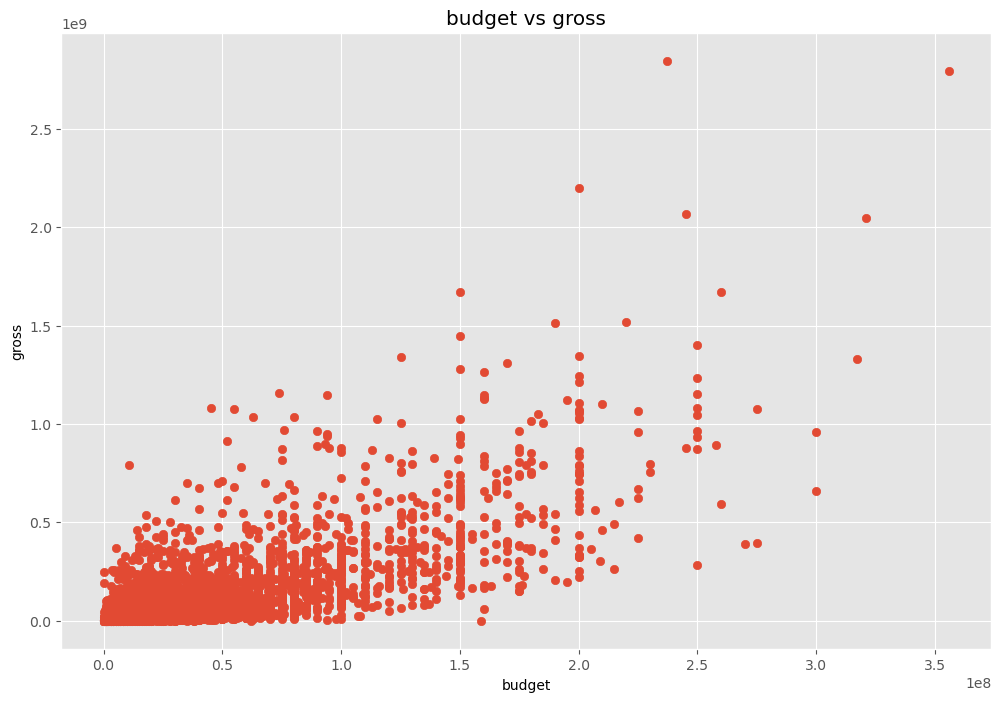

In [53]:
# Look at correlation between budget and gross
plt.scatter(x = df['budget'], y = df['gross'])
plt.xlabel('budget')
plt.ylabel('gross')
plt.title('Budget vs Gross')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

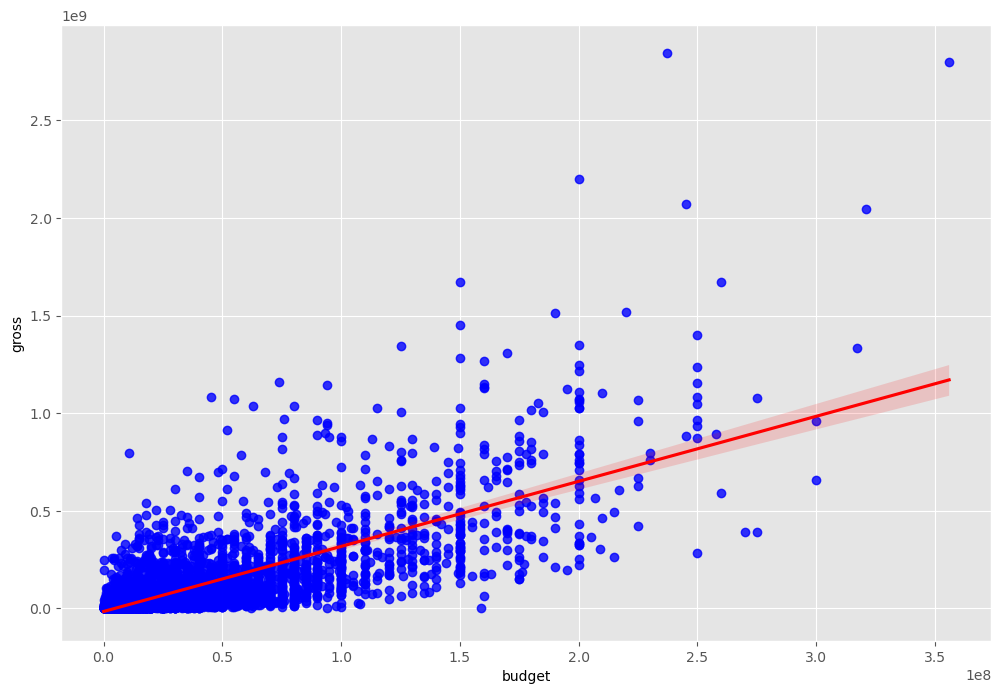

In [56]:
sns.regplot(x = df['budget'], y = df['gross'], data=df, scatter_kws={'color':'blue'}, line_kws={'color':'red'})

In [58]:
# Look at the correlation
df.corr(numeric_only=True)

year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.329321  0.257486  0.120811
score    0.097995  1.000000  0.409182  0.076254  0.186258  0.399451
votes    0.222945  0.409182  1.000000  0.442429  0.630757  0.309212
budget   0.329321  0.076254  0.442429  1.000000  0.740395  0.320447
gross    0.257486  0.186258  0.630757  0.740395  1.000000  0.245216
runtime  0.120811  0.399451  0.309212  0.320447  0.245216  1.000000

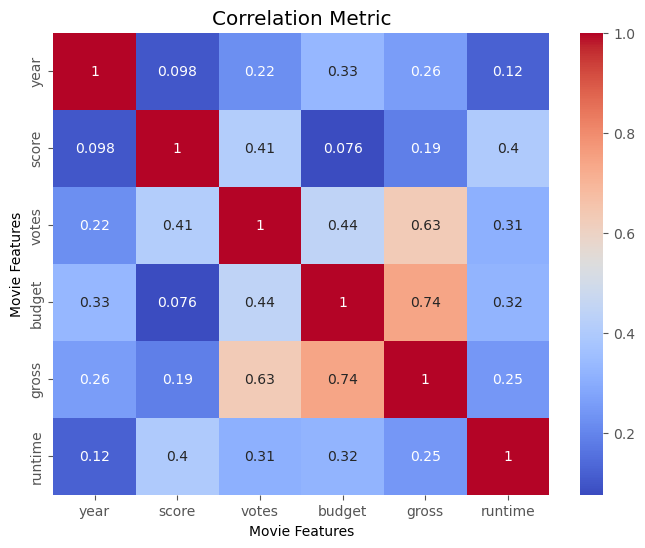

In [67]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm') 
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.title('Correlation Metric')
plt.show()

In [77]:
# Look at Correlation between all Movie Features
# Change Need to Change datatype to Category with Cate Codes 

# Create a Copy to prevent modifying the orignal data
df_numerized = df.copy()

for column in df_numerized.columns:
    if df_numerized[column].dtype == 'object':
        df_numerized[column] = df_numerized[column].astype('category').cat.codes

df_numerized

name  rating  genre  year  released  score      votes  director  writer  \
5445   533       5      0  2009       696    7.8  1100000.0      1155    1778   
7445   535       5      0  2019       183    8.4   903000.0       162     743   
3045  6896       5      6  1997       704    7.8  1100000.0      1155    1778   
6663  5144       5      0  2015       698    7.8   876000.0      1125    2550   
7244   536       5      0  2018       192    8.4   897000.0       162     743   
7480  6194       4      2  2019      1488    6.9   222000.0      1455    1919   
6653  2969       5      0  2015      1704    7.0   593000.0       517    3568   
6043  5502       5      0  2012      2472    8.0  1300000.0      1517    2314   
6646  2145       5      0  2015       221    7.1   370000.0      1189     706   
7494  2131       4      2  2019      2676    6.8   148000.0       432    1950   
6644   534       5      0  2015      2235    7.3   777000.0      1517    2314   
7247   791       5      0  2018       959    7.3   661000.0      2457    3795   
5845  2407       5      1  2011      1445    8.1   790000.0       679    4052   
7075  5145       5      0  2017       661    7.0   581000.0      2282    3518   
7271  2970       5      0  2018      1799    6.2   277000.0      1121    1093   
6262  2130       4      2  2013      2715    7.4   585000.0       432    1950   
7072   657       4      7  2017      2022    7.1   283000.0       250    4000   
7281  2760       4      2  2018      1729    7.6   263000.0       303     491   
7055  5833       5      0  2017        61    6.6   214000.0       835    1431   
6244  2823       5      0  2013      2449    7.1   779000.0      2543    1174   
6688  3622       4      2  2015      1395    6.4   218000.0      1639     534   
6846  1056       5      0  2016      2488    7.8   694000.0       162     743   
7250   474       5      0  2018       748    6.9   404000.0      1189     990   
4245  6221       5      0  2003       680    8.9  1700000.0      2193    1745   
7458  5084       5      0  2019      1501    7.5   359000.0      1463     704   
7456  1061       5      0  2019      2213    6.8   478000.0       147     255   
5878  6968       5      0  2011      1870    6.2   390000.0      1886    1237   
6059  4951       5      0  2012      2804    7.7   642000.0      2476    3125   
6494  6967       5      0  2014      1849    5.6   302000.0      1886    1237   
2448  6194       1      2  1994      1811    8.5   970000.0      2415    1702   
6047  5726       5      0  2012      1510    8.4  1600000.0       483    2265   
7463  5141       5      0  2019       731    6.5   394000.0      1125     714   
7450  2930       6      5  2019      3062    8.4  1000000.0      2767    4248   
7488  6949       1      2  2019      1787    7.7   217000.0      1509    2158   
5685  6948       1      2  2010      1752    8.2   776000.0      1678    2158   
4852  4258       5      0  2006      1645    7.3   668000.0       996    4147   
6869  4616       5      0  2016       673    7.8   572000.0       912     717   
7481   290       4      1  2019      2394    6.9   239000.0      1031    2078   
5860  4261       5      0  2011      2350    6.6   492000.0      2341    4147   
7140  1552       4      2  2017      1896    6.3   119000.0      1639     758   
2245  2967       5      0  1993      1689    8.1   894000.0      2660    2931   
6908  1978       4      2  2016      1744    7.3   250000.0       124     215   
3451  5138       4      0  1999      2318    6.5   748000.0       963    1472   
5667   300       4      1  2010      2182    6.4   392000.0      2745    2607   
6863  7504       4      2  2016      2175    8.0   450000.0       362     576   
6045  6001       5      1  2012       651    7.8   773000.0      2193    1359   
3843  2412       4      1  2001      2593    7.6   685000.0       435    1741   
5243  5725       5      0  2008      1476    9.0  2400000.0       483    2265   
5652  2406       5      1  2010      

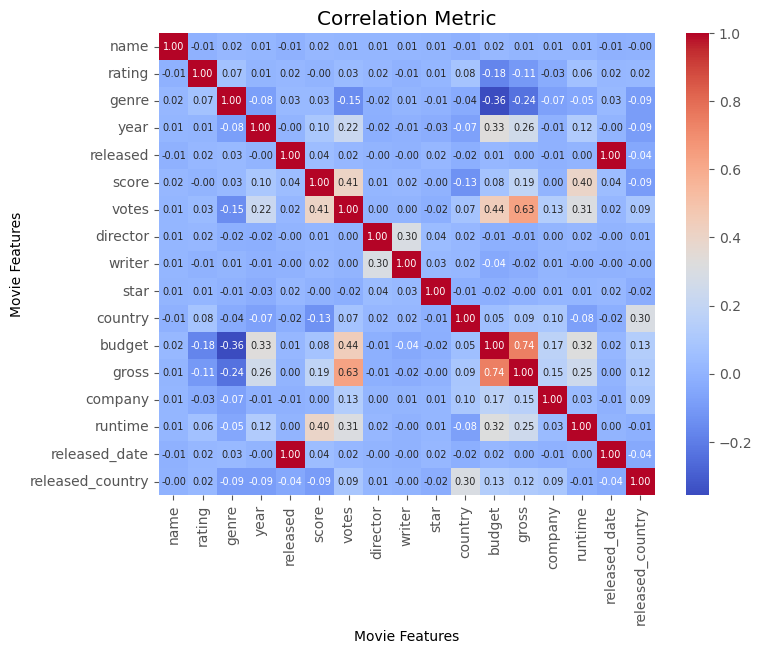

In [83]:
sns.heatmap(df_numerized.corr(numeric_only=True), annot=True, annot_kws={"size": 7}, fmt=".2f", cmap='coolwarm') 
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.title('Correlation Metric')
plt.show()

In [86]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name              name                1.000000
                  rating             -0.008069
                  genre               0.016355
                  year                0.011453
                  released           -0.011311
                  score               0.017097
                  votes               0.013088
                  director            0.009079
                  writer              0.009081
                  star                0.006472
                  country            -0.010737
                  budget              0.023970
                  gross               0.005533
                  company             0.009211
                  runtime             0.010392
                  released_date      -0.011223
                  released_country   -0.001968
rating            name               -0.008069
                  rating              1.000000
                  genre               0.072423
                  year                0.008779
             

In [87]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre             budget             -0.356564
budget            genre              -0.356564
genre             gross              -0.235650
gross             genre              -0.235650
rating            budget             -0.176002
budget            rating             -0.176002
genre             votes              -0.145307
votes             genre              -0.145307
score             country            -0.133348
country           score              -0.133348
rating            gross              -0.107339
gross             rating             -0.107339
score             released_country   -0.092763
released_country  score              -0.092763
genre             released_country   -0.091572
released_country  genre              -0.091572
                  year               -0.089289
year              released_country   -0.089289
                  genre              -0.081261
genre             year               -0.081261
runtime           country            -0.078412
country      

In [90]:
high_corr = sorted_pairs[sorted_pairs > 0.5]
high_corr

votes             gross               0.630757
gross             votes               0.630757
budget            gross               0.740395
gross             budget              0.740395
released          released_date       0.999912
released_date     released            0.999912
name              name                1.000000
writer            writer              1.000000
runtime           runtime             1.000000
company           company             1.000000
gross             gross               1.000000
budget            budget              1.000000
country           country             1.000000
star              star                1.000000
director          director            1.000000
votes             votes               1.000000
score             score               1.000000
released          released            1.000000
year              year                1.000000
genre             genre               1.000000
rating            rating              1.000000
released_date

In [91]:
# Conclusion: votes and budget have the highest corrleation to gross earnings